In [1]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("final_modeling_dataset.csv")

### MODELING

In [3]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

### Data splitting and sampling

In [4]:
df.columns

Index(['Process temperature', 'Tool wear', 'Torque',
       'temperature_differential', 'power_speed_ratio',
       'Process temperature_kmeans_cluster_interaction',
       'Tool wear_kmeans_cluster_interaction',
       'Process temperature_complete_cluster_interaction',
       'Tool wear_complete_cluster_interaction',
       'Torque_kmeans_cluster_interaction',
       'Tool wear_ward_cluster_interaction',
       'Torque_complete_cluster_interaction', 'Machine failure'],
      dtype='object')

In [5]:
df.describe()

,Process temperature,Tool wear,Torque,temperature_differential,power_speed_ratio,Process temperature_kmeans_cluster_interaction,Tool wear_kmeans_cluster_interaction,Process temperature_complete_cluster_interaction,Tool wear_complete_cluster_interaction,Torque_kmeans_cluster_interaction,Tool wear_ward_cluster_interaction,Torque_complete_cluster_interaction,Machine failure
count,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000
mean,0.116787,1.360097,-0.032733,-0.064525,-0.039163,-0.137036,3.455316,0.076757,2.242998,0.104238,2.076446,-0.247006,0.444467
std,0.917823,0.303599,0.716028,0.646460,0.982104,2.954910,2.310990,1.642107,1.532713,1.433168,1.893688,1.739934,0.496932
min,-2.834821,0.693147,-2.022222,-1.294118,-2.767482,-13.837046,0.000000,-7.695525,0.000000,-4.444445,0.000000,-6.066667,0.000000
25%,-0.542832,1.118710,-0.444444,-0.588235,-0.603929,-1.224026,1.631319,-0.812477,0.825395,-0.570915,0.000000,-0.383428,0.000000
50%,0.260991,1.433439,0.118519,-0.119242,0.168274,0.163604,3.465736,0.000000,2.801396,0.266667,1.600097,0.000000,0.000000
75%,0.737986,1.643540,0.542668,0.588235,0.749947,1.412017,5.554138,0.936680,3.337596,0.985754,4.297162,0.888889,1.000000
max,2.490683,1.787529,1.170370,1.352941,1.611337,9.962733,8.202495,7.067581,5.290738,4.925926,5.362587,2.340741,1.000000


80-20 dataset split (train, test)

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(["Machine failure"], axis=1)
y = df["Machine failure"]

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9931 entries, 0 to 9930
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Process temperature                               9931 non-null   float64
 1   Tool wear                                         9931 non-null   float64
 2   Torque                                            9931 non-null   float64
 3   temperature_differential                          9931 non-null   float64
 4   power_speed_ratio                                 9931 non-null   float64
 5   Process temperature_kmeans_cluster_interaction    9931 non-null   float64
 6   Tool wear_kmeans_cluster_interaction              9931 non-null   float64
 7   Process temperature_complete_cluster_interaction  9931 non-null   float64
 8   Tool wear_complete_cluster_interaction            9931 non-null   float64
 9   Torque_kmeans_clust

training set after oversampling

(array([4413.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3531.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

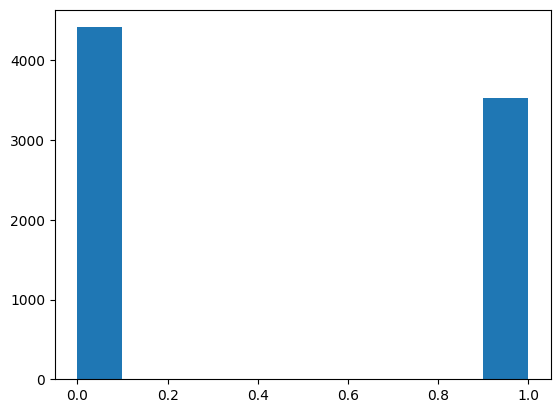

In [97]:
plt.hist(y_train)

### Decision Tree Model

In [98]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [99]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      1104
         1.0       0.91      0.93      0.92       883

    accuracy                           0.93      1987
   macro avg       0.92      0.93      0.92      1987
weighted avg       0.93      0.93      0.93      1987



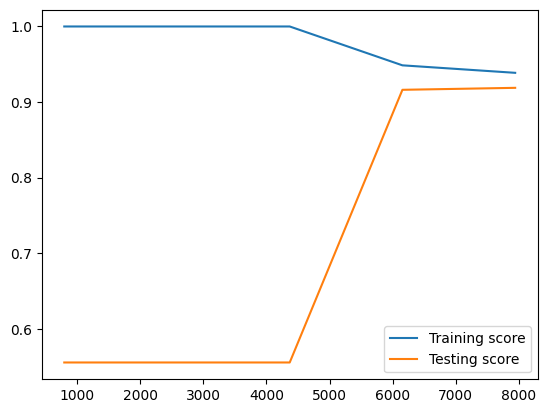

In [100]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

confusion matrix of decision tree model

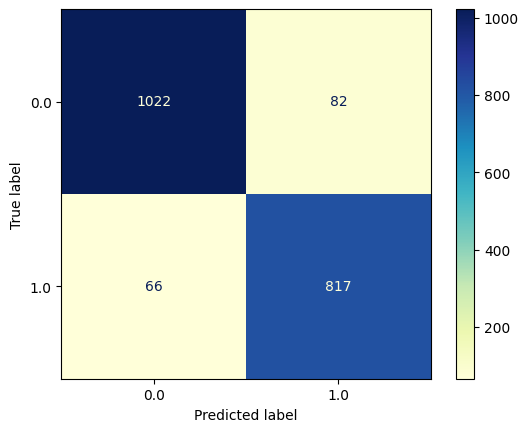

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

Graph

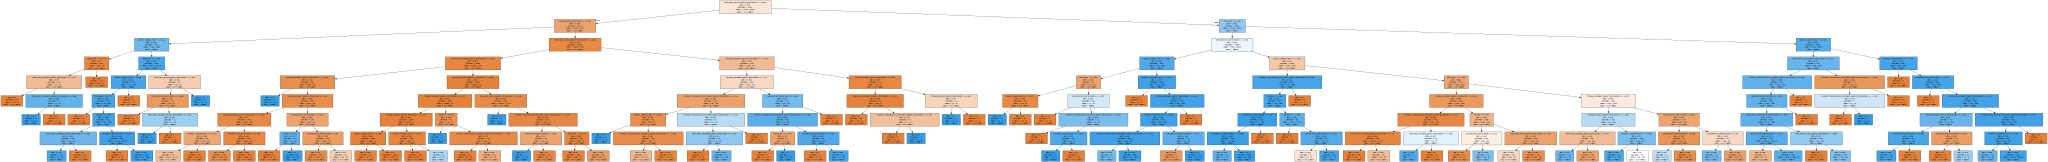

In [102]:
import graphviz
from sklearn import tree

data = tree.export_graphviz(model,
                            feature_names=X.columns,  
                            class_names=['No failure','Failure'],
                            filled=True)

# draw graph
graph = graphviz.Source(data, format="png") 
graph.render('nodes', view=False)
graph

In [103]:
from sklearn.tree import export_text

rules = export_text(model)

# print the rules
print(rules)

|--- feature_10 <= 1.63
|   |--- feature_3 <= -0.71
|   |   |--- feature_4 <= 0.12
|   |   |   |--- feature_1 <= 0.74
|   |   |   |   |--- feature_6 <= 1.43
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_6 >  1.43
|   |   |   |   |   |--- feature_8 <= 1.10
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_8 >  1.10
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_1 >  0.74
|   |   |   |   |--- class: 0.0
|   |   |--- feature_4 >  0.12
|   |   |   |--- feature_1 <= 1.34
|   |   |   |   |--- feature_4 <= 1.20
|   |   |   |   |   |--- feature_1 <= 0.73
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_1 >  0.73
|   |   |   |   |   |   |--- feature_2 <= 0.39
|   |   |   |   |   |   |   |--- feature_8 <= 1.08
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- feature_8 >  1.08
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_2 >  0.39
|   |   |   

### k-NN (K-nearest neighbours) model

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'n_neighbors': 2}


In [105]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [106]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1104
         1.0       0.92      0.94      0.93       883

    accuracy                           0.94      1987
   macro avg       0.93      0.94      0.93      1987
weighted avg       0.94      0.94      0.94      1987



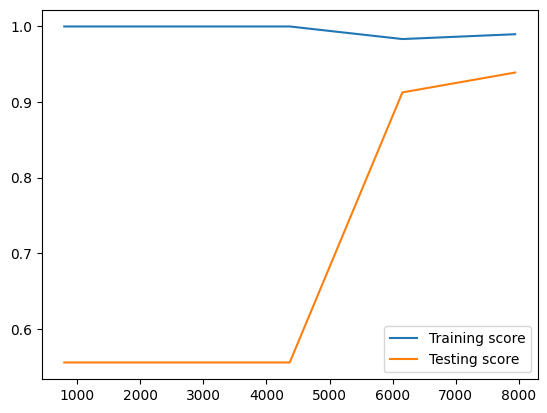

In [107]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

confusion matrix

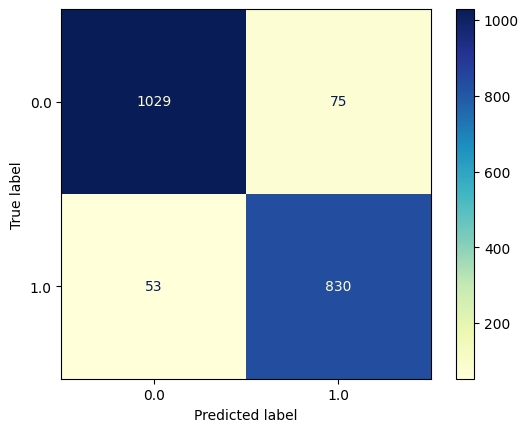

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

### Random forest Model

In [109]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [110]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      1104
         1.0       0.95      0.96      0.95       883

    accuracy                           0.96      1987
   macro avg       0.96      0.96      0.96      1987
weighted avg       0.96      0.96      0.96      1987



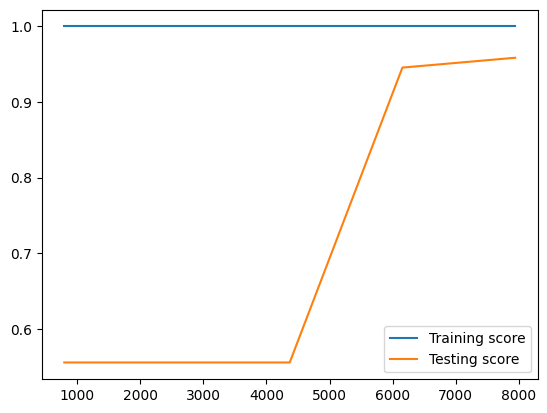

In [111]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

confusion matrix of Random Forest model

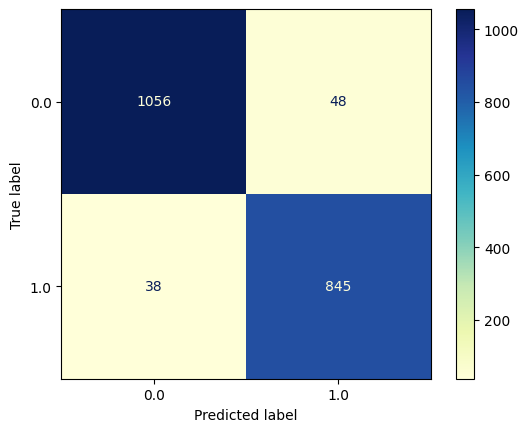

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

### Gradient Boosting Model

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model = GradientBoostingClassifier().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [114]:
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      1104
         1.0       0.91      0.91      0.91       883

    accuracy                           0.92      1987
   macro avg       0.92      0.92      0.92      1987
weighted avg       0.92      0.92      0.92      1987



/home/ubuntu/dev/Stats_analysis/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/dev/Stats_analysis/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/dev/Stats_analysis/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ubuntu/dev/Stats_analysis/.venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.p

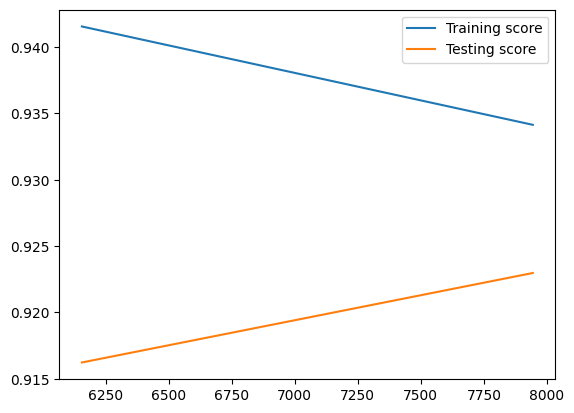

In [115]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

confusion matrix of Gradient Boosting model

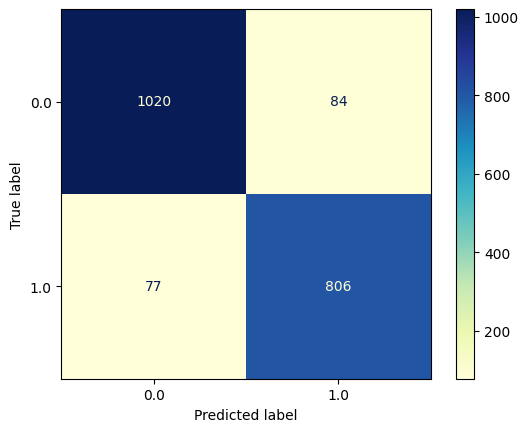

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

### Gaussian Naive Bayes Model

In [117]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model = GaussianNB().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gaussian Naive Bayes", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [118]:
print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))

Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      1104
         1.0       0.69      0.67      0.68       883

    accuracy                           0.72      1987
   macro avg       0.72      0.71      0.71      1987
weighted avg       0.72      0.72      0.72      1987



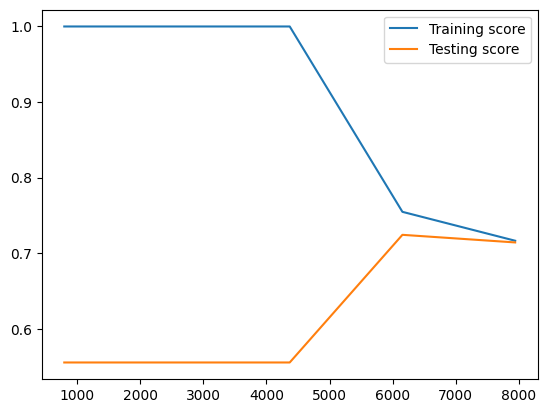

In [119]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

confusion matrix of Gaussian Naive Bayes model

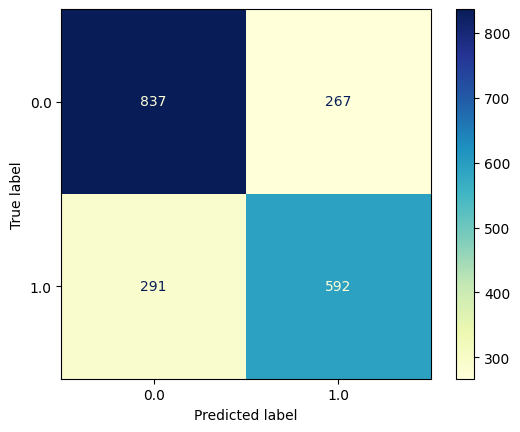

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

### MLP (Multi-layer Perceptron) Model

In [121]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model = MLPClassifier(random_state=1, max_iter=600, learning_rate="invscaling").fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)

Model evaluation:

- 0: No failure
- 1: Machine failure

In [122]:
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92      1104
         1.0       0.89      0.92      0.91       883

    accuracy                           0.91      1987
   macro avg       0.91      0.92      0.91      1987
weighted avg       0.92      0.91      0.91      1987



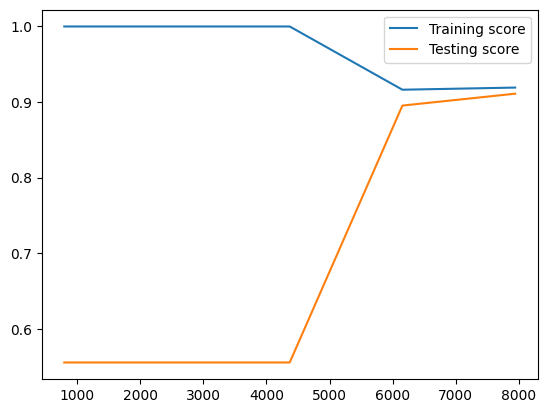

In [123]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

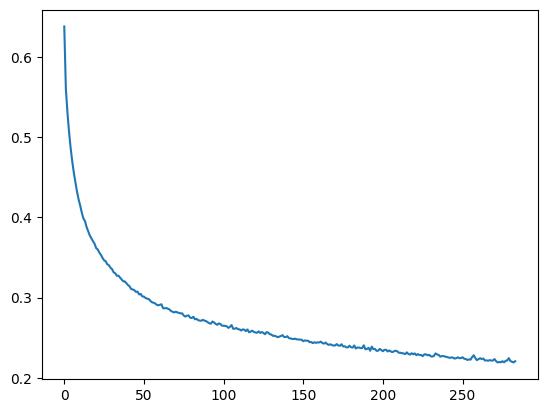

In [124]:
plt.plot(model.loss_curve_)

Confusion matrix of Multi-layer Perceptron model

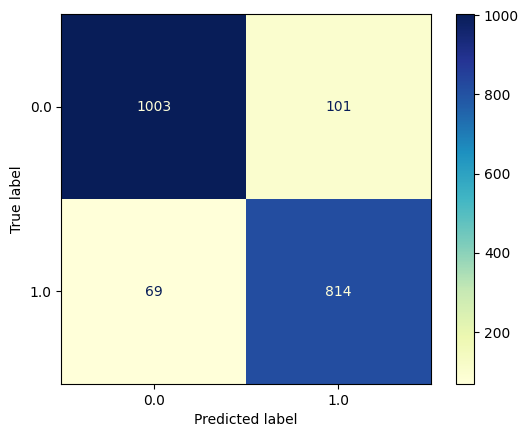

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

### Evaluation

In [126]:
model_performance

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.925516,0.925762,0.925516,0.925578,0.054018,0.001280
k-NN,0.935581,0.935957,0.935581,0.935653,0.013601,0.090031
Random Forest,0.956719,0.956814,0.956719,0.956742,0.542099,0.063862
Gradient Boosting,0.918973,0.919059,0.918973,0.919004,2.053896,0.003744
Gaussian Naive Bayes,0.719175,0.718536,0.719175,0.718750,0.005751,0.001462
Multi-layer Perceptron,0.914444,0.915185,0.914444,0.914576,4.986583,0.002429


In [127]:
df.describe()

,Process temperature,Tool wear,Torque,temperature_differential,power_speed_ratio,Process temperature_kmeans_cluster_interaction,Tool wear_kmeans_cluster_interaction,Process temperature_complete_cluster_interaction,Tool wear_complete_cluster_interaction,Torque_kmeans_cluster_interaction,Tool wear_ward_cluster_interaction,Torque_complete_cluster_interaction,Machine failure
count,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000,9931.000000
mean,0.116787,1.360097,-0.032733,-0.064525,-0.039163,-0.137036,3.455316,0.076757,2.242998,0.104238,2.076446,-0.247006,0.444467
std,0.917823,0.303599,0.716028,0.646460,0.982104,2.954910,2.310990,1.642107,1.532713,1.433168,1.893688,1.739934,0.496932
min,-2.834821,0.693147,-2.022222,-1.294118,-2.767482,-13.837046,0.000000,-7.695525,0.000000,-4.444445,0.000000,-6.066667,0.000000
25%,-0.542832,1.118710,-0.444444,-0.588235,-0.603929,-1.224026,1.631319,-0.812477,0.825395,-0.570915,0.000000,-0.383428,0.000000
50%,0.260991,1.433439,0.118519,-0.119242,0.168274,0.163604,3.465736,0.000000,2.801396,0.266667,1.600097,0.000000,0.000000
75%,0.737986,1.643540,0.542668,0.588235,0.749947,1.412017,5.554138,0.936680,3.337596,0.985754,4.297162,0.888889,1.000000
max,2.490683,1.787529,1.170370,1.352941,1.611337,9.962733,8.202495,7.067581,5.290738,4.925926,5.362587,2.340741,1.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9931 entries, 0 to 9930
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Process temperature                               9931 non-null   float64
 1   Tool wear                                         9931 non-null   float64
 2   Torque                                            9931 non-null   float64
 3   temperature_differential                          9931 non-null   float64
 4   power_speed_ratio                                 9931 non-null   float64
 5   Process temperature_kmeans_cluster_interaction    9931 non-null   float64
 6   Tool wear_kmeans_cluster_interaction              9931 non-null   float64
 7   Process temperature_complete_cluster_interaction  9931 non-null   float64
 8   Tool wear_complete_cluster_interaction            9931 non-null   float64
 9   Torque_kmeans_clust